# Projeto de Análise estatística com Statsmodels

## Problema de Negócio:

 Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Carregando os Dados

In [4]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [5]:
df.shape

(3000, 7)

In [10]:
df.nunique()

valor_aluguel        2662
area_m2               132
ano_construcao         66
codigo_localidade       3
numero_banheiros        2
numero_cozinhas         2
codigo_bairro         336
dtype: int64

In [11]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [12]:
#Exibe as informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


## Análise Exploratória e Análise Estatística

In [14]:
#Verifica se há valores nulos
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [15]:
#Resumo estatístico do dataset
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [16]:
#Resumo Estatístico da variável alvo
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<AxesSubplot:xlabel='valor_aluguel', ylabel='Count'>

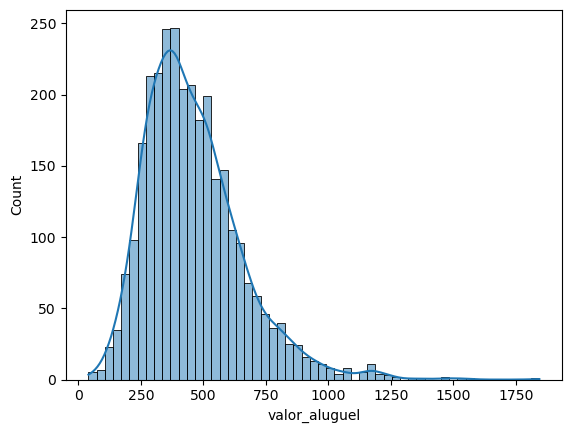

In [18]:
#Histograma da variável alvo
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [19]:
#Verificar a correlação entre as variáveis
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<AxesSubplot:xlabel='area_m2', ylabel='valor_aluguel'>

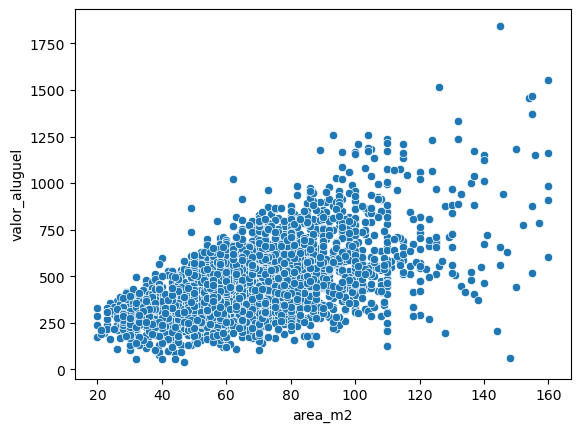

In [20]:
#Analisar a relação entre a variável de entrada e a variável alvo
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')

## Construção do modelo OLS com Statsmodels

In [21]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [23]:
#Definição da variável dependente(alvo)
y = df['valor_aluguel']

In [24]:
#Definindo a variável independente(preditora)
X = df['area_m2']

In [25]:
#O statsmodels requer a adição de uma constante à variávevl
X = sm.add_constant(X)

In [26]:
#Criação do modelo
modelo = sm.OLS(y, X)

In [27]:
#Treinamento do modelo
resultado = modelo.fit()

In [28]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          6.84e-275
Time:                        21:38:10   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

## Plotando o grafico

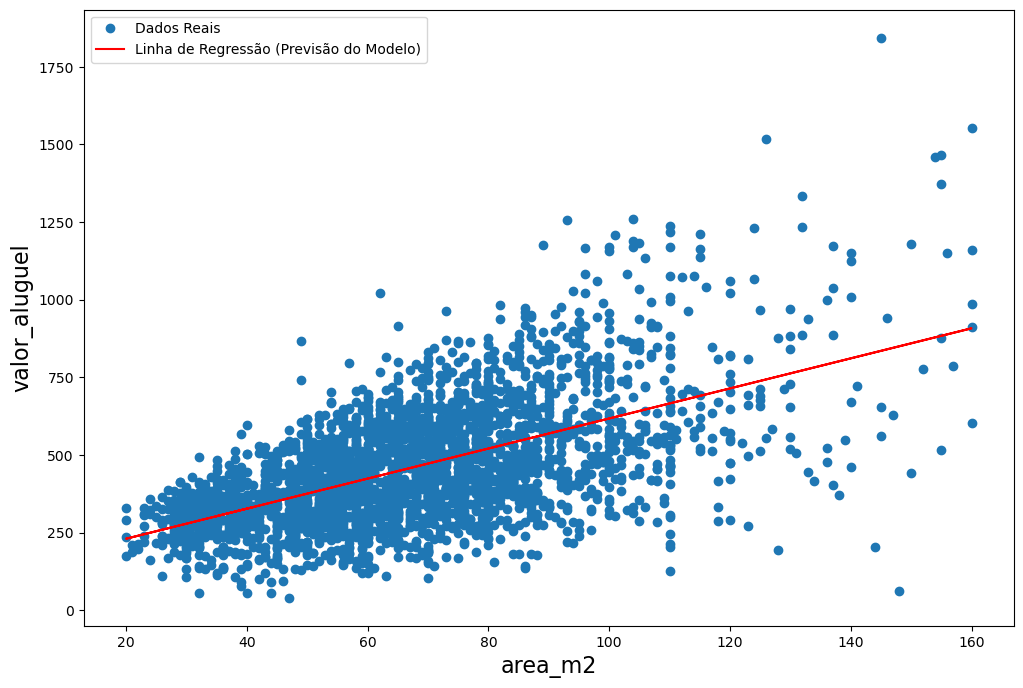

In [29]:
plt.figure(figsize = (12, 8))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_aluguel', size = 16)
plt.plot(X['area_m2'], y, 'o', label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r-', label = 'Linha de Regressão (Previsão do Modelo)')
plt.legend(loc = 'best')
plt.show()

## Conclusão do projeto

Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretanto, apenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R²) de apenas 0.34.

O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222
5,482.82053,62,1962,1,0,0,2222
6,323.69232,31,1965,1,0,0,2211
7,370.97437,61,1957,2,1,0,2142
8,373.69232,72,1978,1,0,0,2143
9,521.69230,75,1968,1,0,0,2142


In [3]:
df2 = df.head(5)

In [4]:
df2

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [27]:
inteiros =[]
flutuante =[]
for linha in df2.columns:
    if df2[linha].dtypes == 'int64':
        inteiros.append(linha)
    else:
        flutuante.append(linha)

In [29]:
print(inteiros)
print()
print(flutuante)

['area_m2', 'ano_construcao', 'codigo_localidade', 'numero_banheiros', 'numero_cozinhas', 'codigo_bairro']

['valor_aluguel']
